In [1]:
import sktime
import pandas

## Train:test=0.75:0.25

In [2]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_squared_error, mean_absolute_percentage_error

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

print('mse:', mean_squared_error(y_test, y_pred, square_root=True))
print('mape:', mean_absolute_percentage_error(y_test, y_pred))

mse: 49.70153658618615
mape: 0.08661467609820378


In [3]:
from sklearn.metrics import mean_squared_error, r2_score
print('r2:', r2_score(y_test, y_pred))
print('rmse:', mean_squared_error(y_test, y_pred, squared=False))

r2: 0.59625378029952
rmse: 49.70153658618615


In [4]:
df = pandas.DataFrame(y.values, columns=['#Passengers'],
    index=[str(y.index[idx].year) + '-' + str(y.index[idx].month) for idx in range(len(y))])
df

,#Passengers
1949-1,112.0
1949-2,118.0
1949-3,132.0
1949-4,129.0
1949-5,121.0
...,...
1960-8,606.0
1960-9,508.0
1960-10,461.0
1960-11,390.0


In [5]:
df_pred = pandas.DataFrame(y_pred.values, columns=['#Passengers'],
    index=[str(y_pred.index[idx].year) + '-' + str(y_pred.index[idx].month) for idx in range(len(y_pred))])
df_pred

,#Passengers
1958-1,341.456423
1958-2,337.564662
1958-3,388.128056
1958-4,372.625121
1958-5,371.882598
1958-6,421.552203
1958-7,461.671563
1958-8,457.651132
1958-9,407.134112
1958-10,354.872814


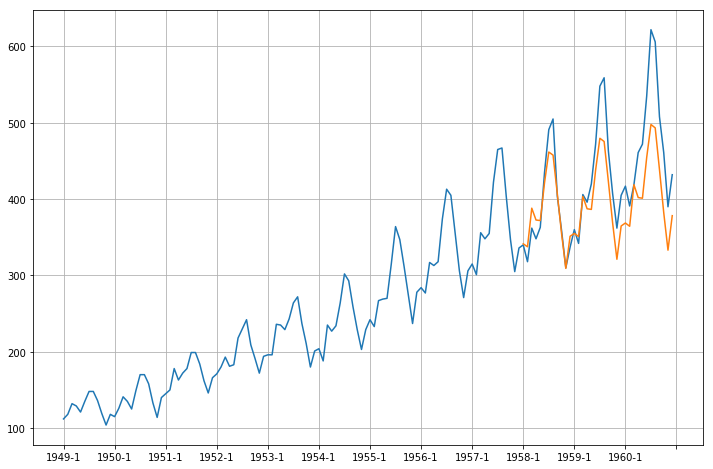

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111)
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
ax.grid()

plt.plot(df)
plt.plot(df_pred)


## Train:test=0.8:0.2

In [7]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_squared_error, mean_absolute_percentage_error

y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=0.2)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

print('mse:', mean_squared_error(y_test, y_pred, square_root=True))
print('mape:', mean_absolute_percentage_error(y_test, y_pred))

mse: 37.69747385902522
mape: 0.07083089352522522


In [8]:
from sklearn.metrics import mean_squared_error, r2_score
print('r2:', r2_score(y_test, y_pred))
print('rmse:', mean_squared_error(y_test, y_pred, squared=False))

r2: 0.7672042119383211
rmse: 37.69747385902522


In [9]:
df_pred = pandas.DataFrame(y_pred.values, columns=['#Passengers'],
    index=[str(y_pred.index[idx].year) + '-' + str(y_pred.index[idx].month) for idx in range(len(y_pred))])
df_pred

,#Passengers
1958-8,488.773992
1958-9,433.371044
1958-10,377.148305
1958-11,329.001969
1958-12,372.409438
1959-1,376.347960
1959-2,372.122092
1959-3,427.725595
1959-4,410.511117
1959-5,409.564305


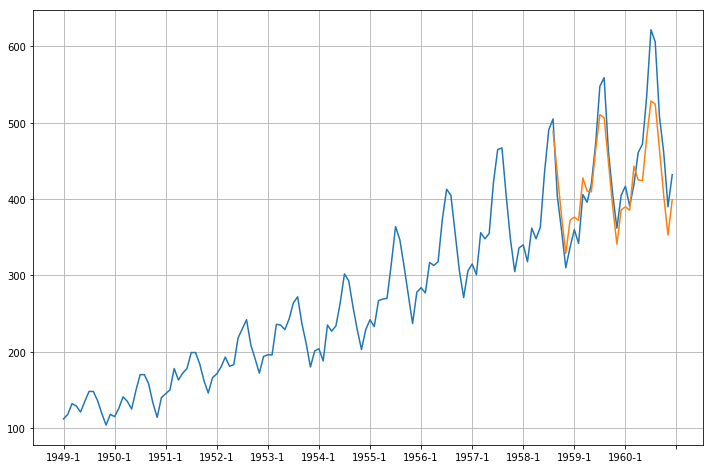

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111)
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
ax.grid()

plt.plot(df)
plt.plot(df_pred)
